<a href="https://colab.research.google.com/github/Letch49/ML-vvsu-2025/blob/feature/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вариант 2 - DIAMOND.CSV

## 1. Анализ целевой переменной Y с точки зрения статистики

1. **Импорт необходимых библиотек

In [143]:
!pip install pandas scikit-learn seaborn scipy

In [144]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [145]:
# Загрузка набора данных
df = pd.read_csv('C:/Users/vitya/diamond.csv')

In [146]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [147]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: Carat Weight
колонка: Cut
колонка: Color
колонка: Clarity
колонка: Polish
колонка: Symmetry
колонка: Report
колонка: Price


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


3. **Проверить наличие пропущенных значений и работа с пропусками для числовых:**

In [149]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [150]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'Price'] = np.nan

In [151]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           5
dtype: int64


In [152]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [153]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.Price = df_median.Price.fillna(df_median.Price.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [154]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.Price = df_mean.Price.fillna(df_median.Price.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


⏰ Заполнение категориальных признаков происходит с помощью ```df.category_variable.mode() (как один из вариантов, хотя и считается недостаточно хорошим).```

Как вариант - можно использовать KNN (K-ближайших соедей)

4. **Выбрать целевую переменную**

⏰ В качестве целевой выбираем категориальную переменную.

```В датасете была выбрана целевая переменная is_best_diamond -> которая будет преобразована из Cut. Символьные значения будут преобразованы в числовые, где Signature-Ideal будет под цифрой 5, Ideal 4 и т. д. Самый лучший алмаз должен будет иметь значение Cut равное 5.

In [155]:
df['is_best_diamond'] = np.where(df['Cut'] == 'Signature-Ideal', 1, 0).astype(int)

In [156]:
df.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price', 'is_best_diamond'],
      dtype='object')

In [157]:
Y = df['is_best_diamond'] # выбираем целевую переменную (категориальную)
X = df.drop('is_best_diamond', axis=1) # переменные для проверки влияния

# Убирается базововая переменная, а не только. Y
X = X.drop('Cut', axis=1)

5. **Графический анализ**

In [158]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,Carat Weight,Price
0,1.10,5169
1,0.83,3470
2,0.85,3183
3,0.91,4370
4,0.83,3171
...,...,...
5995,1.03,6250
5996,1.00,5328
5997,1.02,6157
5998,1.27,11206


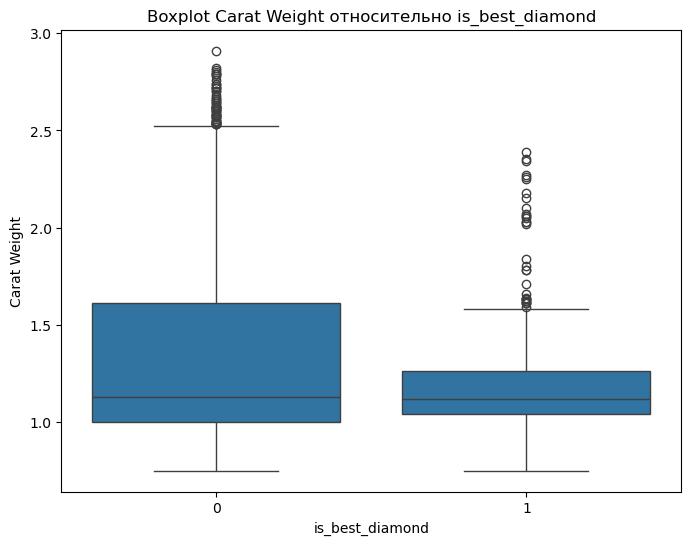

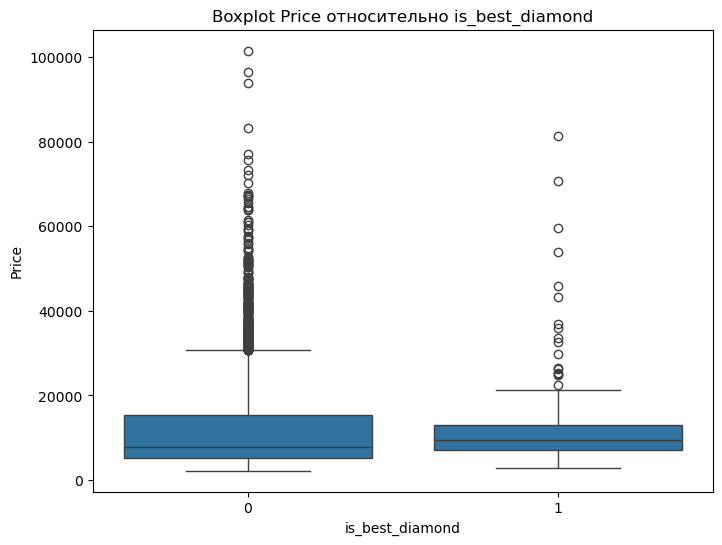

In [159]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_best_diamond', y=col, data=df)
    plt.title(f'Boxplot {col} относительно is_best_diamond')
    plt.show()

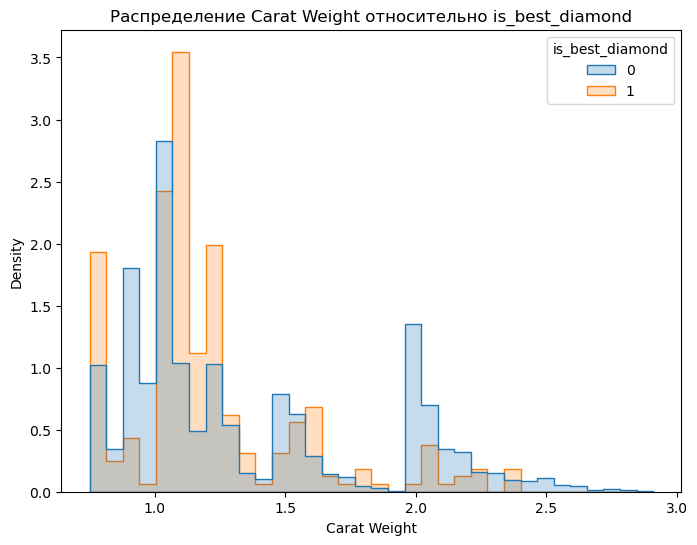

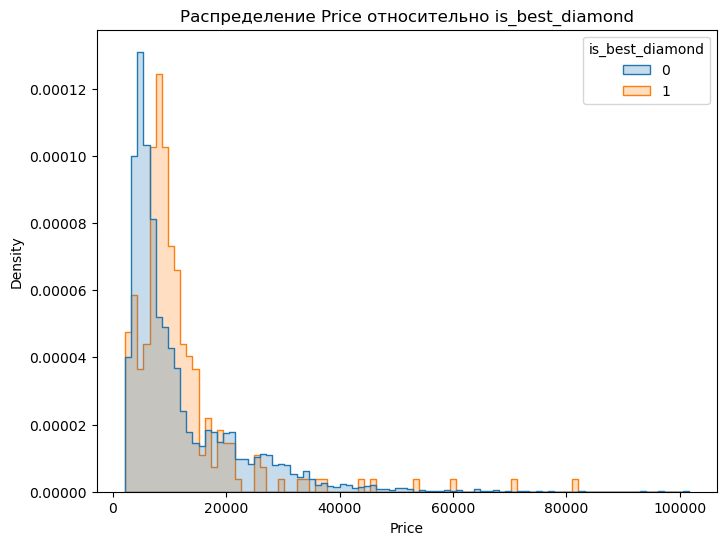

In [160]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='is_best_diamond', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно is_best_diamond')
    plt.show()

Большая часть Carat Weight на блокспоте со значением 0 (то есть их Cut не является Signature-Ideal) сосредоточена в диапазоне от 1.0 до 1.6, так как синий прямоугольник расположен в этом диапазоне. Внутри прямоугольника медиана (черная линия внутри ящика) находится ниже середины, что указывает на асимметрию распределения. Cуществует диапазон без учёта выбросов (две линии, выходящие за синий прямоугольник) от 0.2 до 2.0. Располагается большое количество выбросов (множество точек после линии), начинающиеся от 2.5 до 2.8. Это говорит о значительном количестве алмазов, которые не очень сильно отклоняются от основной массы данных.

Большая часть Carat Weight на блокспоте со значением 1 (то есть их Cut является Signature-Ideal) сосредоточена в диапазоне от 1.05 до 1.3, так как синий прямоугольник расположен в этом диапазоне. Внутри прямоугольника медиана находится чуть ниже середины, что указывает на небольшую асимметрию распределения. Cуществует диапазон без учёта выбросов от 0.2 до 1.55. Располагается определённое количество выбросов, которых гораздо меньше в сравнении с is_best_diamond равная 0. Выбросы начинаются с 1.55 и заканчиваются в 2.4. Это говорит об относительно небольшом количестве алмазов, которые сильно отклоняются от основной массы данных (в is_best_diamond = 0 диапазон выбросов равен 0.3, в is_best_diamond = 1 равен 0.85).

Большая часть Price на блокспоте со значением 0 сосредоточена в диапазоне от 5000 до 15000, так как синий прямоугольник расположен в этом диапазоне. Внутри прямоугольника медиана находится ниже середины, что указывает на асимметрию распределения. Cуществует диапазон без учёта выбросов от 2000 до 32000. Располагается большое количество выбросов, начинающиеся от 32000 до 100000. Это говорит о большом количестве алмазов, которые очень сильно отклоняются от основной массы данных.

Большая часть Price на блокспоте со значением 1 сосредоточена в диапазоне от 8000 до 12000, так как синий прямоугольник расположен в этом диапазоне. Внутри прямоугольника медиана находится чуть ниже середины, что указывает на незначительную асимметрию распределения. Cуществует диапазон без учёта выбросов от 2000 до 20000. Располагается небольшое количество выбросов, начинающиеся от 20000 до 80000. Это говорит о небольшом количестве алмазов, которые очень сильно отклоняются от основной массы данных.

У алмазов качеством Signature-Ideal плотность распределения Carat Weight больше всего в диапазоне от 0.35 до 1.25. У алмазов других качеств плотность распределения Carat Weight больше всего в диапазоне от 0.75 до 1.25. В основном алмазы качества Signature-Ideal менее широконы разбросаны по значениям и сосредоточены вокруг небольших значений Carat Weight, тогда как алмазы других качеств распределены более равномерно, но также сосредоточены вокруг небольших значений Carat Weight.

У алмазов качеством Signature-Ideal плотность распределения Price больше всего в диапазоне от 7000 до 13000. У алмазов других качеств плотность распределения Price больше всего в диапазоне от 3000 до 4000. В основном алмазы качества Signature-Ideal дороже алмазов других качеств на 3000 долларов.

In [161]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('is_best_diamond')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('is_best_diamond')[df.select_dtypes(include=['object']).columns].describe()

In [162]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('is_best_diamond')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для Carat Weight:

                  count      mean       std   min   25%   50%   75%   max
is_best_diamond                                                          
0                5747.0  1.340212  0.479984  0.75  1.00  1.13  1.61  2.91
1                 253.0  1.205217  0.340934  0.75  1.04  1.12  1.26  2.39


Описательная статистика для Price:

                  count          mean           std     min     25%     50%  \
is_best_diamond                                                               
0                5747.0  11802.587437  10207.630636  2184.0  5112.0  7715.0   
1                 253.0  11541.525692   9656.204024  2793.0  7079.0  9330.0   

                     75%       max  
is_best_diamond                     
0                15333.5  101561.0  
1                12869.0   81399.0  




1. Carat Weight (Вес карата):
Среднее значение (mean):

Для обычных бриллиантов (is_best_diamond = 0): 1.34 карата.
Для лучших бриллиантов (is_best_diamond = 1): 1.21 карата.
Средний вес карата у лучших бриллиантов ниже, чем у обычных.
Стандартное отклонение (std):

Обычные бриллианты: 0.48 карата.
Лучшие бриллианты: 0.34 карата.
Стандартное отклонение у обычных бриллиантов выше, что говорит о более широком разбросе веса.
Минимум (min) и максимум (max):

Минимальный вес одинаков для обеих групп: 0.75 карата.
Максимальный вес: обычные бриллианты — 2.91 карата, лучшие — 2.39 карата. Это указывает на то, что обычные бриллианты могут быть значительно крупнее.
Квантили (25%, 50%, 75%):

У лучших бриллиантов более узкий диапазон весов (межквартильный размах меньше), что может указывать на более строгие стандарты веса для этой категории.
2. Price (Цена):
Среднее значение (mean):

Обычные бриллианты: $11,802.59.
Лучшие бриллианты: $11,541.53.
Средняя цена практически одинакова в обеих группах, несмотря на то, что вес у лучших бриллиантов меньше.
Стандартное отклонение (std):

Обычные бриллианты: $10,207.63.
Лучшие бриллианты: $9,656.20.
Разброс цен у обычных бриллиантов выше, что связано с большим диапазоном веса и, возможно, других факторов.
Минимум (min) и максимум (max):

Минимальная цена у обычных бриллиантов ниже ($2,184 против $2,793 у лучших).
Максимальная цена у обычных бриллиантов выше ($101,561 против $81,399 у лучших), что отражает наличие более крупных и дорогих камней среди обычных.
Квантили (25%, 50%, 75%):

В целом цены у лучших бриллиантов более концентрированы в среднем ценовом сегменте, тогда как обычные бриллианты имеют больший разброс.

Основные выводы:
Вес лучших бриллиантов, как правило, меньше, чем у обычных, но это не приводит к значительному снижению средней цены.
Цены лучших бриллиантов более предсказуемы, а у обычных бриллиантов диапазон цен гораздо шире, что, вероятно, связано с наличием более крупных камней среди обычных бриллиантов.

In [163]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


Cut                               Color                   \
                count unique              top  freq count unique top  freq   
is_best_diamond                                                              
0                5747      4            Ideal  2482  5747      6   G  1437   
1                 253      1  Signature-Ideal   253   253      6   G    64   

                Clarity         ... Polish       Symmetry                   \
                  count unique  ...    top  freq    count unique top  freq   
is_best_diamond                 ...                                          
0                  5747      7  ...     VG  2409     5747      4  VG  2417   
1                   253      7  ...     ID   171      253      2  ID   171   

                Report                     
                 count unique   top  freq  
is_best_diamond                            
0                 5747      2   GIA  5184  
1                  253      2  AGSL   171  

[2 rows x 24 columns]

1. Cut (Огранка):
    - Обычные бриллианты (is_best_diamond = 0):
        - Всего: 5747.
        - 4 уникальных категории.
        - Самая частая категория: **Ideal** (Идеальная огранка) — 2482 бриллианта (частота 43%).
   
    - Лучшие бриллианты (is_best_diamond = 1):
        - Всего: 253.
        - 1 уникальная категория: Signature-Ideal (Фирменная идеальная огранка), что предполагает эксклюзивный стандарт огранки для лучших бриллиантов.

2. Color (Цвет):
    - Обычные бриллианты:
        - 6 уникальных категорий цвета.
        - Самый популярный цвет: G — 1437 бриллиантов.
   
    - Лучшие бриллианты:
        - 6 уникальных категорий цвета (совпадает с обычными бриллиантами).
        - Самый частый цвет также G, но с меньшей частотой — 64 бриллианта.

3. Clarity (Чистота):
    - Обычные бриллианты:
        - 7 уникальных категорий.
   
   - Лучшие бриллианты:
     - Также 7 категорий, как и у обычных бриллиантов.

4. Polish (Полировка):
    - Обычные бриллианты:
        - Самая частая категория полировки: VG (Very Good) — 2409 бриллиантов.
   
    - Лучшие бриллианты:
      - Самая частая категория: ID (Ideal) — 171 бриллиант.

5. Symmetry (Симметрия):
    - Обычные бриллианты:
      - Самая частая симметрия: VG (Very Good) — 2417 бриллиантов.
   
    - Лучшие бриллианты:
      - Самая частая симметрия: ID (Ideal) — 171 бриллиант.

6. Report (Сертификат):
    - Обычные бриллианты:
      - Самый частый сертификат: GIA (Gemological Institute of America) — 5184 бриллианта.
   
    - Лучшие бриллианты:
      - Все бриллианты имеют сертификат AGSL (American Gem Society Laboratories) — 171 бриллиант.

Основные выводы:
    - Огранка у обычных бриллиантов варьируется, в то время как все лучшие бриллианты имеют эксклюзивную огранку Signature-Ideal.
    - Цвет и чистота у лучших и обычных бриллиантов разнообразны, но в обеих группах преобладает цвет G.
    - У лучших бриллиантов наблюдается более высокий стандарт для полировки и симметрии (категория Ideal), тогда как у обычных преобладает Very Good.
    - Все лучшие бриллианты сертифицированы AGSL, в то время как большинство обычных бриллиантов сертифицированы GIA.

2. Расчет теста Пирсона

### **Описание:**
Рассчитать коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитать коэффициенты корреляции Пирсона для каждого признака:**

In [164]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,Carat Weight,Price,is_best_diamond
Carat Weight,1.000000,0.858562,-0.057037
Price,0.858562,1.000000,-0.005152
is_best_diamond,-0.057037,-0.005152,1.000000


2. ⏰ **Интерпретировать результаты:**

### Описание корреляций для значимых признаков:

1. Корреляция между Carat Weight (Вес карата) и Price (Цена):
    Коэффициент корреляции: 0.8586.
    Высокая положительная корреляция, что указывает на сильную связь между весом бриллианта и его ценой. Это ожидаемо, так как более крупные бриллианты обычно стоят дороже.
   
3. Корреляция между Carat Weight (Вес карата) и is_best_diamond:
    Коэффициент корреляции: -0.0570.
    Слабая отрицательная корреляция, что означает, что вес карата практически не связан с тем, является ли бриллиант "лучшим". Более тяжелые бриллианты не обязательно относятся к категории лучших бриллиантов.
   
5. Корреляция между Price (Цена) и is_best_diamond:
Коэффициент корреляции: -0.0052.
Почти нулевая корреляция, что указывает на отсутствие значимой связи между ценой бриллианта и тем, является ли он лучшим. Лучшие бриллианты могут стоить как меньше, так и больше обычных, и это не определяется только их статусом.

Основные выводы:
    Цена и вес бриллианта сильно взаимосвязаны (чем больше вес, тем выше цена).
    Вес бриллианта не является важным фактором для определения того, является ли он лучшим.
    Статус "лучший бриллиант" слабо коррелирует с ценой, что может указывать на то, что другие характеристики (огранка, симметрия, полировка и сертификат) влияют на статус "лучший" больше, чем цена.

## 3. Машинное обучение

In [184]:
df = 0

In [185]:
df = pd.read_csv('C:/Users/vitya/diamond.csv')

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [187]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['Color', 'Clarity', 'Polish', 'Symmetry', 'Report']


In [188]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [189]:
X_processed

,Carat Weight,Price,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.10,5169,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True
1,0.83,3470,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False
2,0.85,3183,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,0.91,4370,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True
4,0.83,3171,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,6250,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
5996,1.00,5328,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True
5997,1.02,6157,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
5998,1.27,11206,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


In [190]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64', 'int']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['Carat Weight', 'Price']


In [191]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [192]:
X_processed

,Carat Weight,Price,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,0.162037,0.030037,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True
1,0.037037,0.012941,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False
2,0.046296,0.010053,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,0.074074,0.021997,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True
4,0.037037,0.009932,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.129630,0.040915,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
5996,0.115741,0.031637,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True
5997,0.125000,0.039979,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
5998,0.240741,0.090786,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


**Функция для обучения и оценки модели**

In [193]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [194]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9575
Точность на тестовой выборке: 0.9583

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1149
           1       0.67      0.04      0.07        51

    accuracy                           0.96      1200
   macro avg       0.81      0.52      0.53      1200
weighted avg       0.95      0.96      0.94      1200



In [195]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


         Feature  Coefficient
18   Symmetry_VG    -2.634451
15     Polish_VG    -2.360461
0   Carat Weight    -2.149285
16    Symmetry_G    -1.724458
14     Polish_ID     1.688578
1          Price     1.495456
13      Polish_G    -1.245366
17   Symmetry_ID     1.073655
6        Color_I    -0.621294
10   Clarity_VS2    -0.619546
12  Clarity_VVS2    -0.561372
19    Report_GIA     0.517436
5        Color_H    -0.442742
4        Color_G    -0.437939
11  Clarity_VVS1    -0.385009
7     Clarity_IF    -0.341001
8    Clarity_SI1    -0.297800
2        Color_E     0.186527
3        Color_F    -0.167219
9    Clarity_VS1    -0.033485


## 4. Построение модели логистической регрессии для предсказания качества алмаза

### 4.1 Кросс-валидация модели

In [196]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.9575
Отклонение точности: 0.0007


In [197]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

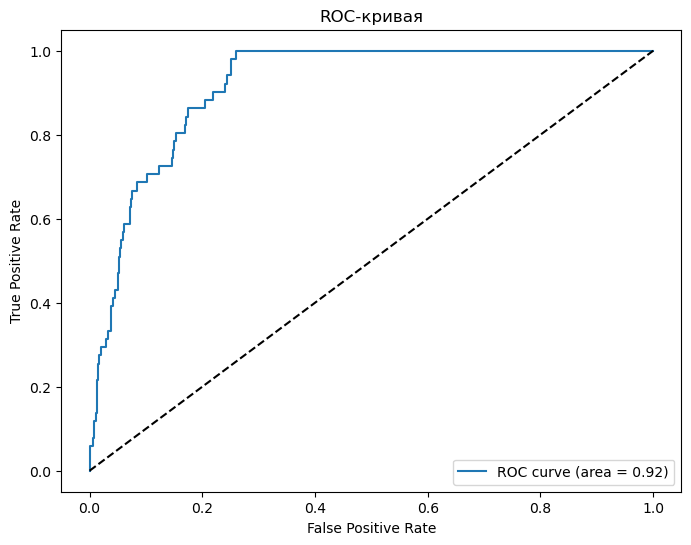

In [198]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()